# Projeto DL 2021 - Grupo Stonks

In [1]:
!pip install --upgrade tensorflow keras Pillow
!pip install SciPy

     |████████████████████████████████| 28.5 MB 56 kB/s             


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2021-10-22 17:32:37.568176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-22 17:32:37.568220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
tf.__version__

'2.6.0'

## Parte 1 - Processamento dos dados

### Processar o Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('img/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 80 images belonging to 4 classes.


### Processar o Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.


## Parte 2 - Criação do CNN

In [6]:
cnn = tf.keras.models.Sequential()

2021-10-22 17:32:59.349161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-22 17:32:59.349251: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-22 17:32:59.349304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thinkpad): /proc/driver/nvidia/version does not exist
2021-10-22 17:32:59.352248: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Passo 1 - Convolução e agrupamento

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 2 - Adicionar segunda e terceira camada de convolução

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 3 - Redimensionar as camadas

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Passo 4 - Conectar todas as camadas

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))

### Passo 5 - Camadas de saída

In [12]:
cnn.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

## Parte 3 - Treinamento do CNN

### Passo 1 - Compilar o CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Passo 2 - Treinar o CNN no Training set e comparar com o Test set

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

2021-10-22 17:33:20.842559: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2021-10-22 17:33:44.020179: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28096128 exceeds 10% of free system memory.


2/3 [===================>..........] - ETA: 3s - loss: 1.4943 - accuracy: 0.2500 

2021-10-22 17:33:48.152522: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28096128 exceeds 10% of free system memory.
2021-10-22 17:33:56.307557: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28096128 exceeds 10% of free system memory.


3/3 [==============================] - 39s 8s/step - loss: 1.4781 - accuracy: 0.2250 - val_loss: 1.3946 - val_accuracy: 0.2500
Epoch 2/40


2021-10-22 17:34:15.273563: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28096128 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 19s - loss: 1.4179 - accuracy: 0.2500

2021-10-22 17:34:24.593743: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 28096128 exceeds 10% of free system memory.


3/3 [==============================] - 26s 8s/step - loss: 1.3963 - accuracy: 0.2375 - val_loss: 1.3948 - val_accuracy: 0.2500
Epoch 3/40
3/3 [==============================] - 28s 10s/step - loss: 1.3807 - accuracy: 0.2750 - val_loss: 1.3760 - val_accuracy: 0.3000
Epoch 4/40
3/3 [==============================] - 27s 8s/step - loss: 1.3841 - accuracy: 0.2500 - val_loss: 1.3716 - val_accuracy: 0.3000
Epoch 5/40
3/3 [==============================] - 38s 16s/step - loss: 1.3670 - accuracy: 0.3250 - val_loss: 1.3719 - val_accuracy: 0.3000
Epoch 6/40
3/3 [==============================] - 28s 9s/step - loss: 1.3807 - accuracy: 0.2750 - val_loss: 1.3696 - val_accuracy: 0.3000
Epoch 7/40
3/3 [==============================] - 34s 8s/step - loss: 1.3544 - accuracy: 0.3625 - val_loss: 1.3626 - val_accuracy: 0.3000
Epoch 8/40
3/3 [==============================] - 26s 9s/step - loss: 1.3505 - accuracy: 0.3750 - val_loss: 1.3536 - val_accuracy: 0.3000
Epoch 9/40
3/3 [===========================

# Matriz de confusão

In [16]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.1 MB 45.4 MB/s            
     |████████████████████████████████| 306 kB 37.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8f11e4b8c8c7dce157615ac9e804c337cfd1a10b0acfc1d50c90527c71b9fb50
  Stored in directory: /home/thinkpad/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [18]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 14.5 MB/s            
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 1.1 MB 1.4 MB/s            


/home/thinkpad/Projects/projetoDL2021/venv/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

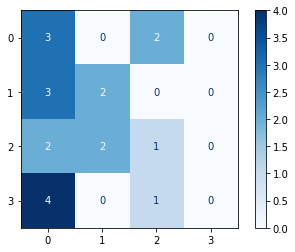

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Y_pred = cnn.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ["anger", "disgust", "fear", "happiness", "sadness"]

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Part 4 - Making a single prediction

In [20]:
import numpy as np
from keras.preprocessing import image
percent = 0.8
emotions = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness'}
test_image = image.load_img('img/single_prediction/raiva.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
max_value = max(result[0]) 
max_index = np.where(result[0] == max_value)
if max_value > percent:
    prediction = emotions[max_index[0][0]]
else:
    prediction = 'Não identificado'

In [21]:
prediction

'anger'

In [22]:
max_value

0.97995645

## Fim